In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
X = 6 * np.random.rand(100, 1) - 3
Y = 2 * X**2 + 1 + np.random.randn(100, 1)
# Quadratic relationship y = 2x^2 + 1 with some noise
X.shape, Y.shape


((100, 1), (100, 1))

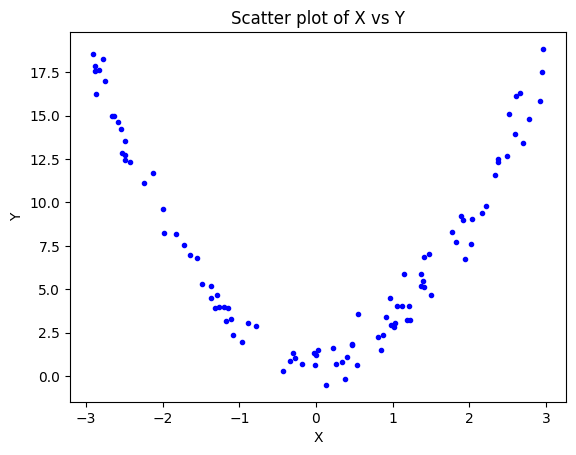

In [6]:
plt.plot(X, Y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of X vs Y")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)


LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
score = r2_score(Y_test, regression.predict(X_test))
print("R^2 score:", score)

R^2 score: 0.024553625020699243


Coefficients: [[-0.34037184]]
Intercept: [7.48607705]


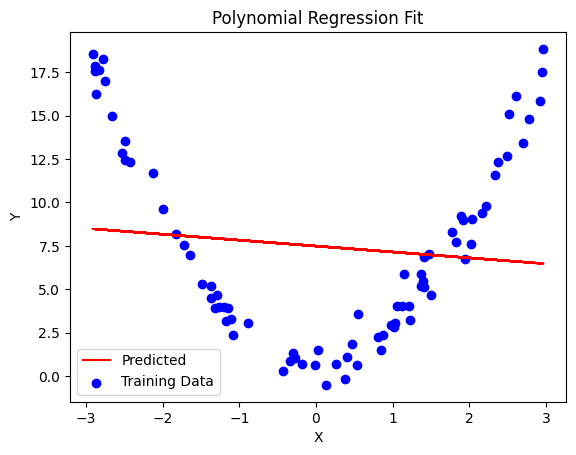

In [10]:
plt.plot(X_train, regression.predict(X_train), color='red', label='Predicted')
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Fit")
plt.legend()
print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [12]:
X_poly

array([[ 1.00000000e+00,  9.79134695e-01,  9.58704750e-01],
       [ 1.00000000e+00,  2.22077925e+00,  4.93186047e+00],
       [ 1.00000000e+00,  1.89589372e+00,  3.59441301e+00],
       [ 1.00000000e+00,  1.49995329e+00,  2.24985988e+00],
       [ 1.00000000e+00, -1.48855486e+00,  2.21579558e+00],
       [ 1.00000000e+00,  1.12137203e+00,  1.25747523e+00],
       [ 1.00000000e+00,  2.02276116e+00,  4.09156269e+00],
       [ 1.00000000e+00,  1.77294893e+00,  3.14334791e+00],
       [ 1.00000000e+00,  2.03654197e+00,  4.14750319e+00],
       [ 1.00000000e+00,  8.46178858e-01,  7.16018659e-01],
       [ 1.00000000e+00, -1.07904003e+00,  1.16432738e+00],
       [ 1.00000000e+00, -2.48726367e+00,  6.18648054e+00],
       [ 1.00000000e+00, -1.28703770e+00,  1.65646603e+00],
       [ 1.00000000e+00,  5.43516162e-01,  2.95409818e-01],
       [ 1.00000000e+00,  1.94623648e+00,  3.78783646e+00],
       [ 1.00000000e+00, -2.52537392e+00,  6.37751343e+00],
       [ 1.00000000e+00, -2.71564119e-01

In [13]:
X_poly_test

array([[ 1.00000000e+00, -1.54675383e+00,  2.39244741e+00],
       [ 1.00000000e+00, -9.70890660e-01,  9.42628674e-01],
       [ 1.00000000e+00,  4.66110251e-01,  2.17258766e-01],
       [ 1.00000000e+00, -7.84601796e-01,  6.15599978e-01],
       [ 1.00000000e+00, -2.54052797e+00,  6.45428237e+00],
       [ 1.00000000e+00,  2.25886261e-01,  5.10246030e-02],
       [ 1.00000000e+00, -2.63429329e+00,  6.93950113e+00],
       [ 1.00000000e+00, -2.18793707e-02,  4.78706863e-04],
       [ 1.00000000e+00,  1.18247648e+00,  1.39825063e+00],
       [ 1.00000000e+00, -2.57908377e+00,  6.65167311e+00],
       [ 1.00000000e+00,  9.68552488e-01,  9.38093923e-01],
       [ 1.00000000e+00, -1.98552383e+00,  3.94230488e+00],
       [ 1.00000000e+00, -4.41685634e-03,  1.95086199e-05],
       [ 1.00000000e+00,  3.37325677e-01,  1.13788612e-01],
       [ 1.00000000e+00,  2.37851468e+00,  5.65733206e+00],
       [ 1.00000000e+00, -2.24721631e+00,  5.04998113e+00],
       [ 1.00000000e+00,  2.60298845e+00

In [14]:
regression.fit(X_poly, Y_train)
Y_pred = regression.predict(X_poly_test)
score_poly = r2_score(Y_test, Y_pred)
print("R^2 score for polynomial regression:", score_poly)

R^2 score for polynomial regression: 0.9840046645175707


In [15]:
regression.coef_, regression.intercept_

(array([[ 0.        , -0.07885799,  1.97098208]]), array([1.07580825]))

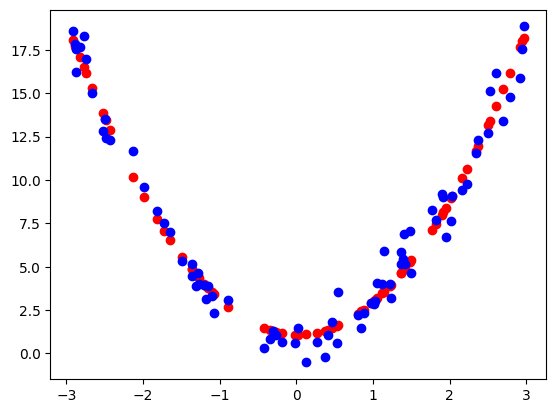

In [16]:
plt.scatter(X_train, regression.predict(X_poly), color='red', label='Predicted')
plt.scatter(X_train, Y_train, color='blue', label='Training Data')

In [17]:
# Predicted values for the training set
x_new = np.linspace(-3, 3, 100).reshape(-1, 1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.93939394e+00,  8.64003673e+00],
       [ 1.00000000e+00, -2.87878788e+00,  8.28741965e+00],
       [ 1.00000000e+00, -2.81818182e+00,  7.94214876e+00],
       [ 1.00000000e+00, -2.75757576e+00,  7.60422406e+00],
       [ 1.00000000e+00, -2.69696970e+00,  7.27364555e+00],
       [ 1.00000000e+00, -2.63636364e+00,  6.95041322e+00],
       [ 1.00000000e+00, -2.57575758e+00,  6.63452709e+00],
       [ 1.00000000e+00, -2.51515152e+00,  6.32598714e+00],
       [ 1.00000000e+00, -2.45454545e+00,  6.02479339e+00],
       [ 1.00000000e+00, -2.39393939e+00,  5.73094582e+00],
       [ 1.00000000e+00, -2.33333333e+00,  5.44444444e+00],
       [ 1.00000000e+00, -2.27272727e+00,  5.16528926e+00],
       [ 1.00000000e+00, -2.21212121e+00,  4.89348026e+00],
       [ 1.00000000e+00, -2.15151515e+00,  4.62901745e+00],
       [ 1.00000000e+00, -2.09090909e+00,  4.37190083e+00],
       [ 1.00000000e+00, -2.03030303e+00

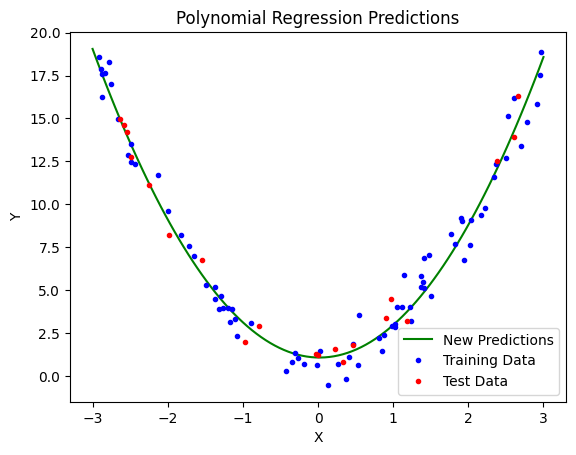

In [18]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new, color='green', label='New Predictions')
plt.plot(X_train, Y_train, "b.", label='Training Data')
plt.plot(X_test, Y_test, "r.", label='Test Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Predictions")
plt.legend()
plt.show()


In [19]:
from sklearn.pipeline import Pipeline


In [36]:
def polynomial_regression_pipeline(degree=2):
    x_new = np.linspace(-3, 3, 100).reshape(-1, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    poly_reg = Pipeline([
        ('poly_features', poly_features),
        ('lin_reg', lin_reg)
    ])
    poly_reg.fit(X_train, Y_train)
    y_new = poly_reg.predict(x_new)
    plt.plot(x_new, y_new, color='green', label='New Predictions')
    plt.plot(X_train, Y_train, "b.", label='Training Data')
    plt.plot(X_test, Y_test, "r.", label='Test Data')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Polynomial Regression Predictions (Degree {degree})")
    plt.legend()
    plt.show()

    

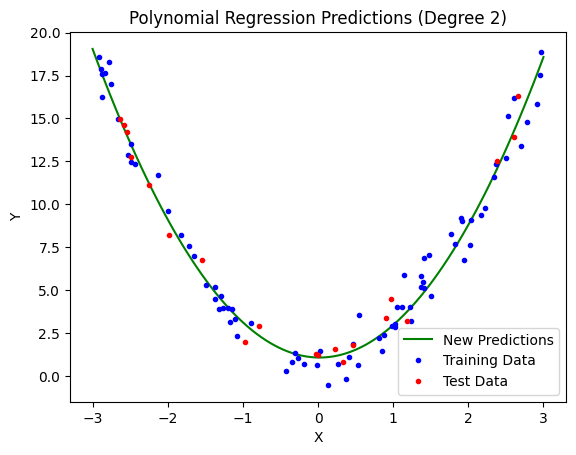

In [37]:
polynomial_regression_pipeline(2)